# 6.22 Gradient Descent Variants
In this video, we'll take you through some of the Gradient Descent Variants:

1. Batch GD
2. Stochastic GD
3. min-batch GD

## 1. Setup data

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

np.random.seed(seed=40)

X, y = make_circles(n_samples=2000, factor=0.5, noise=0.15)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
labels = { 0: "dogs", 1: "cats"}
idx_class_0 = y_train == 0 
idx_class_1 = y_train == 1 

y_train_labels = np.zeros((y_train.size, 2)) 
y_train_labels[idx_class_1, 1] = 1
y_train_labels[idx_class_0, 0] = 1


y_test_labels = np.zeros((y_test.size, 2)) 
y_test_labels[y_test == 1 , 1] = 1
y_test_labels[y_test == 0 , 0] = 1
print("X_train:", X_train.shape)
print("y_train shape:", y_train_labels.shape)
print("X_test:", X_test.shape)
print("y_test shape:", y_test_labels.shape)

X_train: (1500, 2)
y_train shape: (1500, 2)
X_test: (500, 2)
y_test shape: (500, 2)


# 2. Define helper functions

In [74]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

def sigmoid(z):
    return 1. / (1. + np.exp(-z))

def output_layer_activation(A1, Theta_2, b2):
    return softmax((A1 @ Theta_2) + b2)

def hidden_layer_activation(X, Theta_1, b1):
    return sigmoid((X @ Theta_1) + b1)

def forward_pass(X, Theta_1, b1, Theta_2, b2):
    A1 = hidden_layer_activation(X, Theta_1, b1)
    A2 = output_layer_activation(A1, Theta_2, b2)
    return (A1, A2)

def cross_entropy_loss(Y_hat, Y):
    return - (Y * np.log(Y_hat)).sum() / Y.shape[0] 

def get_output_error(Y_hat, Y):
    return Y_hat - Y

def get_hidden_layer_error(A1, Theta_2, Delta_3):
    return np.multiply(np.multiply(A1,(1 - A1)), (Delta_3 @ Theta_2.T))

def get_output_gradient(A1, Delta_3):
    return  A1.T @ Delta_3

def get_output_bias_gradient(Delta_3):
    return np.sum(Delta_3, axis=0, keepdims=True)

def get_hidden_gradient(X, Delta_2):
    return X.T @ Delta_2

def get_hidden_bias_gradient(Delta_2):
    return np.sum(Delta_2, axis=0, keepdims=True)

def calculate_gradients(X, Y, A1, A2, params):

    Theta_1, b1, Theta_2, b2 = params

    # Calculate Error 
    Delta_3 = get_output_error(A2, Y)
    Delta_2 = get_hidden_layer_error(A1, Theta_2, Delta_3)
    
    # Calculate Output Gradients
    JTheta_2 = get_output_gradient(A1, Delta_3)
    Jb2 = get_output_bias_gradient(Delta_3)
    
    # Calculate Hidden Layer Gradients
    JTheta_1 = get_hidden_gradient(X, Delta_2)
    Jb1 = get_hidden_bias_gradient(Delta_2)

    return [JTheta_1, Jb1, JTheta_2, Jb2]

def evaluate_validation_loss(X, y, params):
    Theta_1, b1, Theta_2, b2 = params
    _, yhat = forward_pass(X, Theta_1, b1, Theta_2, b2)
    return cross_entropy_loss(yhat, y)

def get_new_parameters(Js, params, learning_rate):    
    
    return [
    params[0] - (learning_rate * Js[0]),
    params[1] - (learning_rate * Js[1]),
    params[2] - (learning_rate * Js[2]),
    params[3] - (learning_rate * Js[3]) ]


def do_one_step_gd(learning_rate, Theta_1, Theta_2, b1, b2, X_train, y_train, X_test, y_test):
    
    A1, A2 = forward_pass(X_train, Theta_1, b1, Theta_2, b2)
    
    t_loss = cross_entropy_loss(A2, y_train)
    
    params = (Theta_1, b1, Theta_2, b2)
  
    Js = calculate_gradients(X_train, y_train, A1, A2, params)

    v_loss = evaluate_validation_loss(X_test, y_test, params)


    Theta_1, b1, Theta_2, b2 = get_new_parameters(Js, params, learning_rate)

    return (t_loss, v_loss), (Theta_1, b1, Theta_2, b2)

def plot_loss(training_loss, validation_loss, sub_title):
    plt.plot(training_loss, label='training')
    plt.plot(validation_loss, label='test')
    plt.title(f"Error ({sub_title}) - last val loss: {validation_loss[-1]:.3f}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.xlim(0, len(training_loss))
    plt.show()

## 3. Define Parameters

In [75]:
learning_rate = 0.01
MAX_EPOCHS = 30

b1 = np.random.randn(1, 3) 
Theta_1 = np.random.randn(2, 3)
b2 = np.random.randn(1, 2)
Theta_2 = np.random.randn(3, 2)

## 4. Training

### 4.1 Batch Gradient Descent

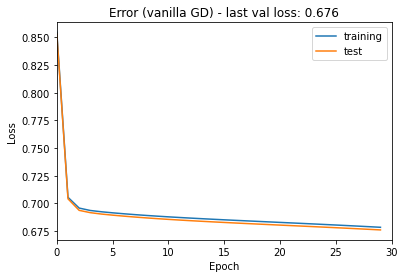

In [76]:
def do_batch_gd(max_epochs, learning_rate, OTheta_1, OTheta_2, Ob1, Ob2, X_train, y_train, X_test, y_test):

    b1 = np.copy(Ob1)
    b2 = np.copy(Ob2)
    Theta_1 = np.copy(OTheta_1)
    Theta_2 = np.copy(OTheta_2)    
    training_loss = []
    validation_loss = []

    for i in range(0, max_epochs):

        (t_loss, v_loss), (Theta_1, b1, Theta_2, b2) = do_one_step_gd(learning_rate, Theta_1, Theta_2, 
                                                                      b1, b2, 
                                                                      X_train, y_train, 
                                                                      X_test, y_test)

        training_loss.append(t_loss)
        validation_loss.append(v_loss)
    
    return training_loss, validation_loss
    
#learning_rate = 0.01  
learning_rate = 0.001
training_loss, validation_loss = do_batch_gd(MAX_EPOCHS, learning_rate,
                                             Theta_1, Theta_2, 
                                             b1, b2, 
                                             X_train, y_train_labels, 
                                             X_test, y_test_labels)    

plot_loss(training_loss, validation_loss, "vanilla GD")

### 4.2 Stochastic Gradient Descent

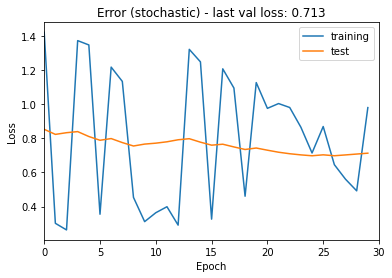

In [78]:
def do_stochastic_gd(max_epochs, learning_rate, OTheta_1, OTheta_2, Ob1, Ob2, X_train, y_train, X_test, y_test):

    b1 = np.copy(Ob1)
    b2 = np.copy(Ob2)
    Theta_1 = np.copy(OTheta_1)
    Theta_2 = np.copy(OTheta_2)    
    training_loss = []
    validation_loss = []

    rng = np.random.default_rng()
    
    for i in range(0, max_epochs):

        # random sample example    
        rand_index = rng.choice(X_train.shape[0], 1)
        x_train_sample = X_train[rand_index,]
        y_train_sample = y_train_labels[rand_index,]
        
        (t_loss, v_loss), (Theta_1, b1, Theta_2, b2) = do_one_step_gd(learning_rate, Theta_1, Theta_2, 
                                                                      b1, b2, 
                                                                      x_train_sample, y_train_sample, 
                                                                      X_test, y_test)
        training_loss.append(t_loss)
        validation_loss.append(v_loss)
    
    return training_loss, validation_loss


learning_rate = 0.04
training_loss, validation_loss = do_stochastic_gd(MAX_EPOCHS, learning_rate, Theta_1, Theta_2, 
                                             b1, b2, 
                                             X_train, y_train_labels, 
                                             X_test, y_test_labels)

plot_loss(training_loss, validation_loss, "stochastic")

### 4.3 Mini-batch Gradient Descent

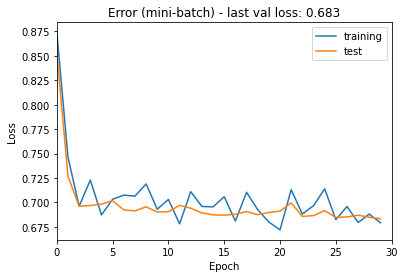

In [80]:
def do_mini_batch_gd(epochs, learning_rate, OTheta_1, OTheta_2, Ob1, Ob2, X_train, y_train, X_test, y_test):

    b1 = np.copy(Ob1)
    b2 = np.copy(Ob2)
    Theta_1 = np.copy(OTheta_1)
    Theta_2 = np.copy(OTheta_2)    
    training_loss = []
    validation_loss = []
    mini_batch_size = 64
    
    rng = np.random.default_rng()
    
    for i in range(0, epochs):
        
        # random sample example    
        rand_index = rng.choice(X_train.shape[0], mini_batch_size)
        x_train_sample = X_train[rand_index,]
        y_train_sample = y_train_labels[rand_index,]
        
        (t_loss, v_loss), (Theta_1, b1, Theta_2, b2) = do_one_step_gd(learning_rate, Theta_1, Theta_2, 
                                                                      b1, b2, 
                                                                      x_train_sample, y_train_sample, 
                                                                      X_test, y_test)
        
        training_loss.append(t_loss) ##only append per epoch, not per mini-batch.
        validation_loss.append(v_loss) ##only append per epoch, not per mini-batch. Note: we should only be calculating val loss once per epoch.
    
    return training_loss, validation_loss

learning_rate = 0.01
training_loss, validation_loss = do_mini_batch_gd(MAX_EPOCHS, learning_rate,
                                                  Theta_1, Theta_2, 
                                             b1, b2, 
                                             X_train, y_train_labels, 
                                             X_test, y_test_labels)

plot_loss(training_loss, validation_loss, "mini-batch")